# Path smoothing
Smoothen the path through gradient descent.  
### Make a copy of the original path  
`y_i = x_i`  
### Optimise over two terms  
```
# minimise distance between original points and smooth points
min (x_i - y_i)^2
# minimise distance between consecutive smooth points
min (y_i - y_(i+1))^2
```  
### Combine and weight by parameters alpha and beta
`y_i = y_i + alpha * (x_i - y_i) + beta * (y_(i+1) + y_(i-1) - 2 * y_i)`

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from copy import deepcopy

In [108]:
# plot each iteration of path smoothing
def plot_smooth(path):
    x1 = [row[0] for row in path]
    y1 = [row[1] for row in path]
    x2 = deepcopy(x1)
    y2 = deepcopy(y1)

    # get all intermediate smoothened paths
    paths = smooth(path, save_intermediate=True)

    # for larger numbers of smoothing steps, plot only every nth step
    if len(paths) > 20:
        include_step = list(map(int, np.floor(np.linspace(0, len(paths), 10))))
        # always include the final path
        if (len(paths) - 1) not in include_step:
            include_step.append((len(paths) - 1))
    else:
        include_step = range(20)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.close()
    ax.cla()

    ax.plot(x1, y1, '-r')
    ax.plot(x2, y2, '-g')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Smoothing step 0")

    display(fig)    
    clear_output(wait = True)
    plt.pause(0.2) 

    for step, smooth_path in enumerate(paths):
        if step not in include_step:
            continue
        ax.cla()
        x2 = [row[0] for row in smooth_path]
        y2 = [row[1] for row in smooth_path]

        ax.plot(x1, y1, '-r')
        ax.plot(x2, y2, '-g')

        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_title(f"Smoothing step {step + 1}")

        display(fig)    
        clear_output(wait = True)
        plt.pause(0.1)

In [109]:
# -----------
# User Instructions
#
# Define a function smooth that takes a path as its input
# (with optional parameters for weight_data, weight_smooth,
# and tolerance) and returns a smooth path. The first and 
# last points should remain unchanged.
#
# Smoothing should be implemented by iteratively updating
# each entry in newpath until some desired level of accuracy
# is reached. The update should be done according to the
# gradient descent equations given in the instructor's note
# below (the equations given in the video are not quite 
# correct).
# -----------

# thank you to EnTerr for posting this on our discussion forum
def printpaths(path,newpath):
    for old,new in zip(path,newpath):
        print('['+ ', '.join('%.3f'%x for x in old) + \
               '] -> ['+ ', '.join('%.3f'%x for x in new) +']')

# Don't modify path inside your function.
path = [[0, 0],
        [0, 1],
        [0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2],
        [4, 3],
        [4, 4]]

def smooth(path, weight_data = 0.5, weight_smooth = 0.1, tolerance = 0.000001,
    iter_max=1000, save_intermediate=False):

    # Make a deep copy of path into newpath
    newpath = deepcopy(path)

    # optionally store all intermediate paths
    if save_intermediate:
        paths = []

    # track how big the change is in each step
    # either stop on convergence (change below tolerance)
    # or after iter_max iterations.
    iter_count = 0
    change = tolerance
    while change >= tolerance:
        change = 0.0
        if iter_count >= iter_max:
            raise(Warning("Convergence not reached within max iterations."))
            return newpath

        # update all points except the startpoint and endpoint
        for i in range(1, (len(path) - 1)):
            for j in range(len(path[i])):
                previous_path_val = newpath[i][j]
                newpath[i][j] += (
                    weight_data * (path[i][j] - newpath[i][j]) +
                    weight_smooth * (newpath[i + 1][j] + newpath[i - 1][j] - 2 * newpath[i][j])
                )
                # total change over all points in the path
                change += abs(newpath[i][j] - previous_path_val)
                # optionally save the new path
                if save_intermediate:
                    paths.append(newpath)
        iter_count += 1
    if save_intermediate:
        return paths
    return newpath

printpaths(path,smooth(path))


[0.000, 0.000] -> [0.000, 0.000]
[0.000, 1.000] -> [0.021, 0.979]
[0.000, 2.000] -> [0.149, 1.851]
[1.000, 2.000] -> [1.021, 1.979]
[2.000, 2.000] -> [2.000, 2.000]
[3.000, 2.000] -> [2.979, 2.021]
[4.000, 2.000] -> [3.851, 2.149]
[4.000, 3.000] -> [3.979, 3.021]
[4.000, 4.000] -> [4.000, 4.000]


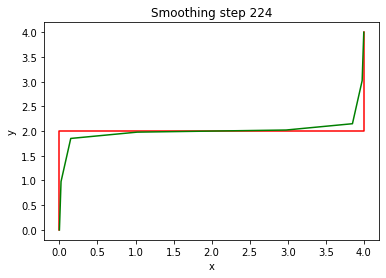

In [110]:
plot_smooth(path)